In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Mile Stone 2/Dataset/MDS/final_df_renamed.csv')

In [ ]:
df_first = df.drop_duplicates(subset='Participant ID', keep='last')

df_1 = df_first[df_first['Decoded Value for COHORT'] != 'SWEDD']

df_1 = df_1.drop(columns = ['Visit ID', 'Record ID', 'Participant ID'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_1['Decoded Value for COHORT'] = label_encoder.fit_transform(df_1['Decoded Value for COHORT'])

df_1 = df_1.reset_index(drop = True)

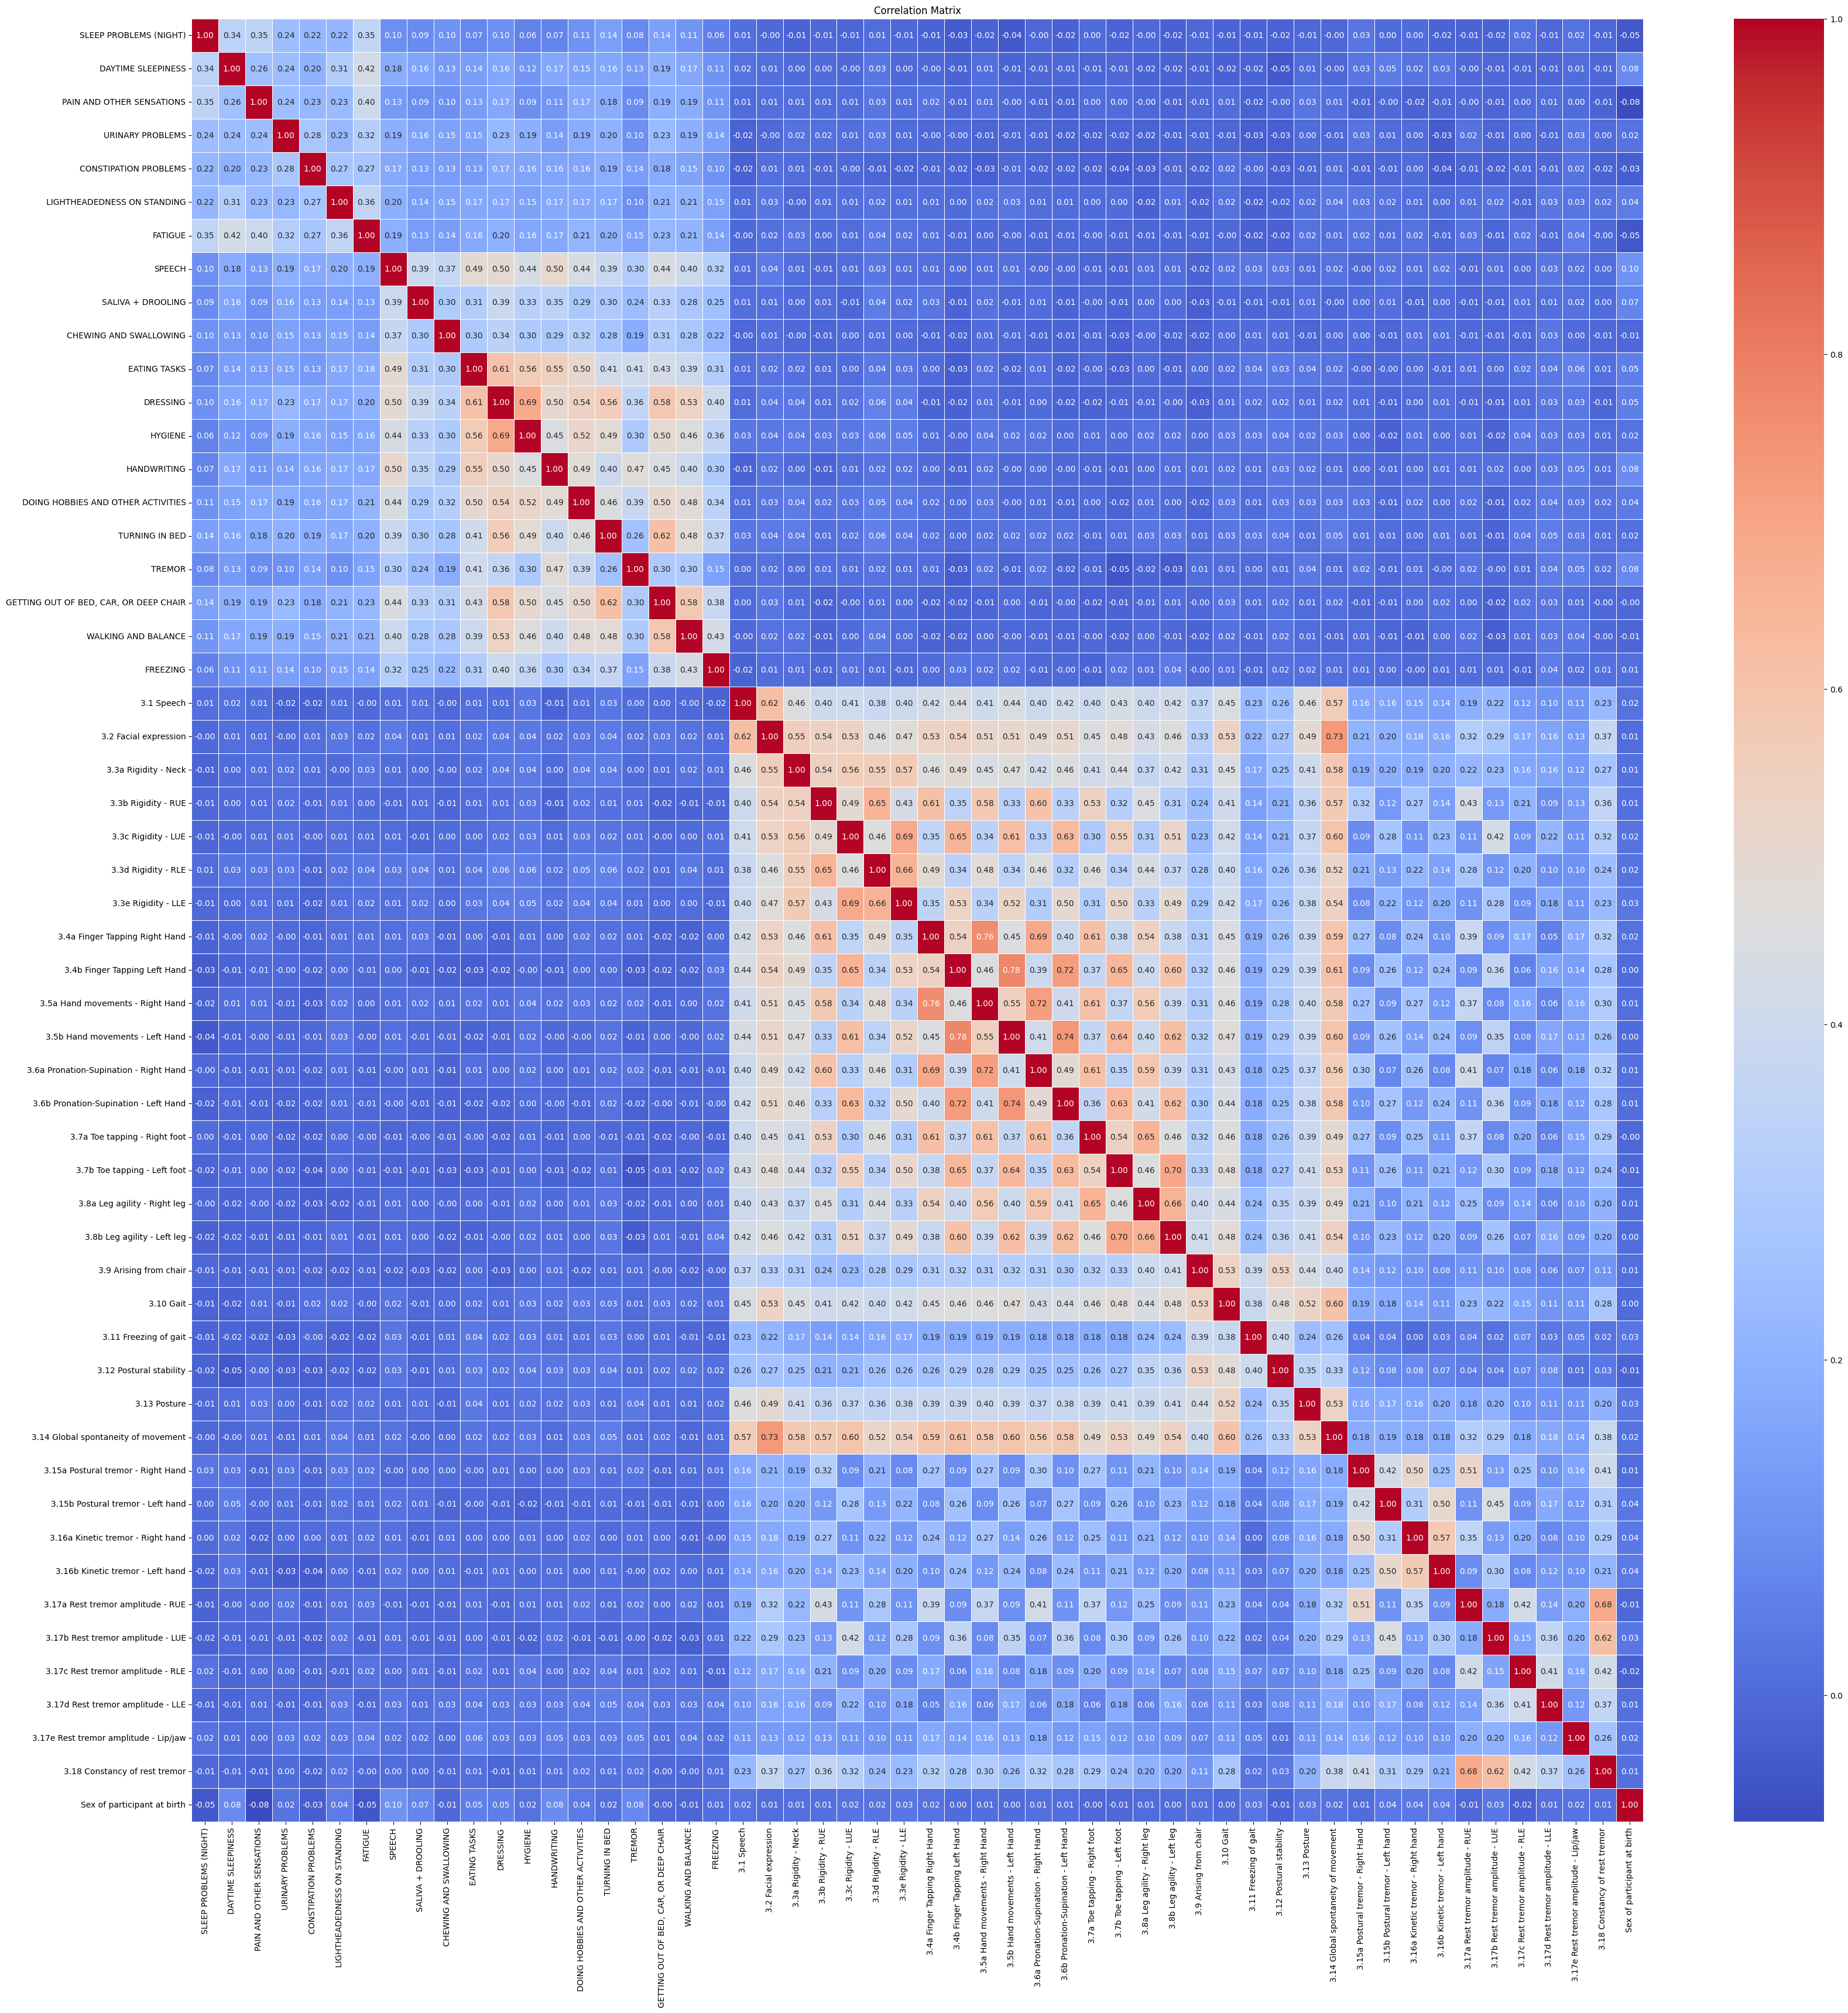

In [ ]:
df_corr = df_1.drop(columns = 'Decoded Value for COHORT')

correlation_matrix = df_corr.corr()

# Step 3: Optionally, visualize the correlation matrix with a heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

[0.28945674 0.14603246 0.06543759 0.05838576 0.05341545 0.05164683
 0.04508166 0.04242642 0.03531007 0.03305465 0.02980117 0.02963885
 0.02366052 0.02313171 0.01873974 0.01663814 0.01156657 0.00994169
 0.00979049 0.00684347]


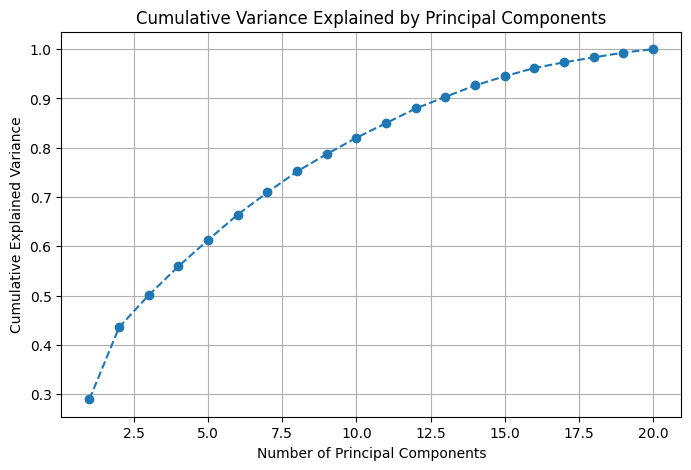

In [ ]:
section_1 = ['SLEEP PROBLEMS (NIGHT)', 'DAYTIME SLEEPINESS',
       'PAIN AND OTHER SENSATIONS', 'URINARY PROBLEMS',
       'CONSTIPATION PROBLEMS', 'LIGHTHEADEDNESS ON STANDING', 'FATIGUE',
       'SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS',
       'DRESSING', 'HYGIENE', 'HANDWRITING',
       'DOING HOBBIES AND OTHER ACTIVITIES', 'TURNING IN BED', 'TREMOR',
       'GETTING OUT OF BED, CAR, OR DEEP CHAIR', 'WALKING AND BALANCE',
       'FREEZING']

section_2 = ['3.1 Speech', '3.2 Facial expression',
       '3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE',
       '3.3d Rigidity - RLE', '3.3e Rigidity - LLE',
       '3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand',
       '3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand',
       '3.6a Pronation-Supination - Right Hand',
       '3.6b Pronation-Supination - Left Hand',
       '3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot',
       '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg',
       '3.9 Arising from chair', '3.10 Gait', '3.11 Freezing of gait',
       '3.12 Postural stability', '3.13 Posture',
       '3.14 Global spontaneity of movement']

section_3 = ['3.15a Postural tremor - Right Hand',
       '3.15b Postural tremor - Left hand',
       '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand',
       '3.17a Rest tremor amplitude - RUE',
       '3.17b Rest tremor amplitude - LUE',
       '3.17c Rest tremor amplitude - RLE',
       '3.17d Rest tremor amplitude - LLE',
       '3.17e Rest tremor amplitude - Lip/jaw',
       '3.18 Constancy of rest tremor']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_section_1 = scaler.fit_transform(df_1[section_1])
X_section_2 = scaler.fit_transform(df_1[section_2])
X_section_3 = scaler.fit_transform(df_1[section_3])# Apply PCA to reduce the dimensions within each section

pca = PCA()
X_pca = pca.fit_transform(X_section_1)

explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print(explained_variance)

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Predictive model

---



In [ ]:
df = pd.read_csv(r"D:\Downloads\final_df_renamed.csv")
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Downloads\\final_df_renamed.csv'

In [ ]:
columns_to_drop = ['3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE', '3.3d Rigidity - RLE',
                    '3.3e Rigidity - LLE', '3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand',
                   '3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand',
                   '3.6a Pronation-Supination - Right Hand', '3.6b Pronation-Supination - Left Hand',
                   '3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot',
                   '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg',
                   '3.15a Postural tremor - Right Hand', '3.15b Postural tremor - Left hand',
                   '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand',
                   '3.17a Rest tremor amplitude - RUE', '3.17b Rest tremor amplitude - LUE',
                   '3.17c Rest tremor amplitude - RLE', '3.17d Rest tremor amplitude - LLE',
                   '3.17e Rest tremor amplitude - Lip/jaw']

df_new = df.drop(columns = columns_to_drop)
df_first = df_new.drop_duplicates(subset='Participant ID', keep='last')

label_counts = df_first['Decoded Value for COHORT'].value_counts(normalize=True) * 100

df_1 = df_first[df_first['Decoded Value for COHORT'] != 'SWEDD']

df_1 = df_1.drop(columns = ['Visit ID', 'Record ID', 'Participant ID'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_1['Decoded Value for COHORT'] = label_encoder.fit_transform(df_1['Decoded Value for COHORT'])

df_1 = df_1.reset_index(drop = True)

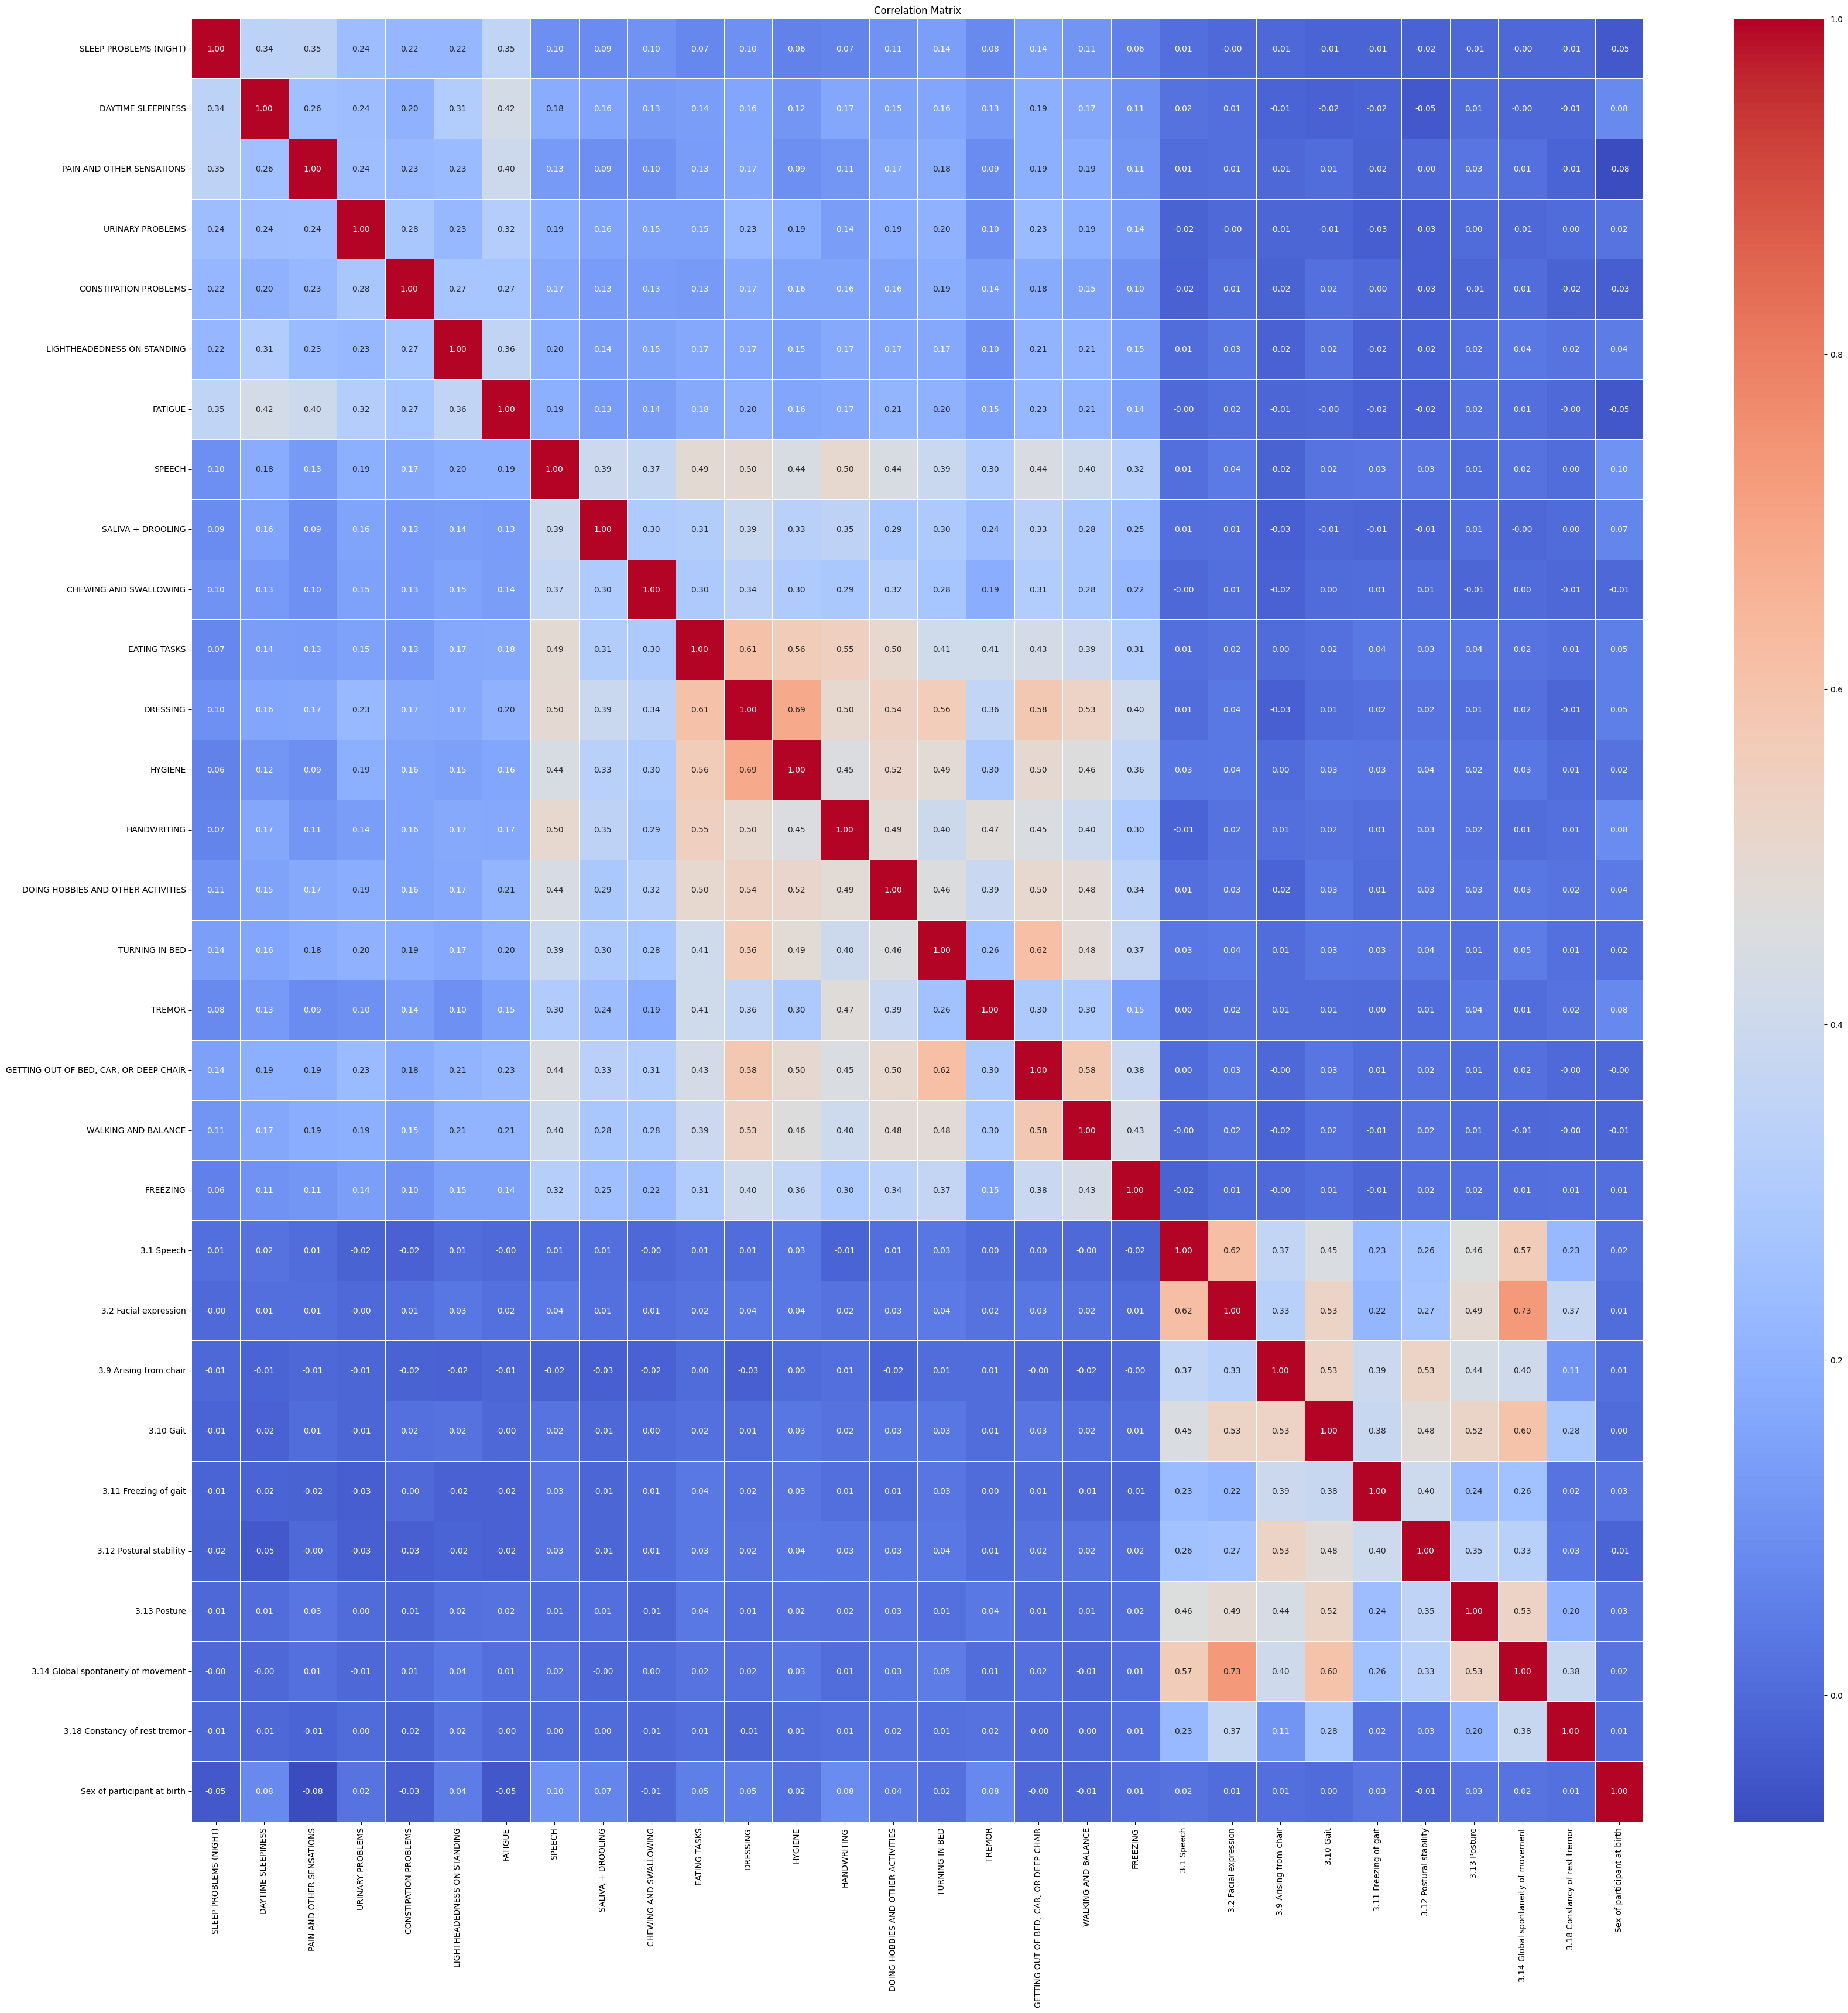

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df_1.drop(columns = 'Decoded Value for COHORT')

correlation_matrix = df_corr.corr()

# Step 3: Optionally, visualize the correlation matrix with a heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_2 = df_1.drop(columns = ['3.17 Rest_Tremor_Amplitude_Total',
                            '3.4 Finger_Tapping_Total', '3.6 Pronation_Supination_Total'])
df_2.shape

KeyError: "['3.17 Rest_Tremor_Amplitude_Total', '3.4 Finger_Tapping_Total', '3.6 Pronation_Supination_Total'] not found in axis"

In [ ]:
df_corr2 = df_2.drop(columns = 'Decoded Value for COHORT')

correlation_matrix = df_corr2.corr()

# Step 3: Optionally, visualize the correlation matrix with a heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

NameError: name 'df_2' is not defined

In [ ]:

X = df_2.drop(columns=['Decoded Value for COHORT'])
y = df_2['Decoded Value for COHORT']

NameError: name 'df_2' is not defined

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'X_train' is not defined